In [166]:
import torch
import matplotlib.pyplot as plt

In [167]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc3(x)
        return x

net = RegressionNet(90)

In [168]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------

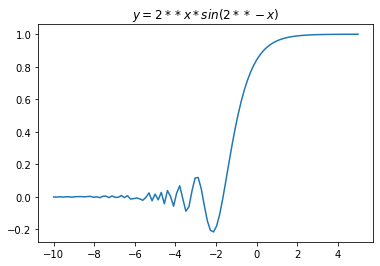

In [169]:
x_train =  torch.linspace(-10,5,100)
y_train = target_function(x_train)
plt.plot(x_train.numpy(), y_train.numpy())
plt.title('$y = 2**x * sin(2**-x)$');

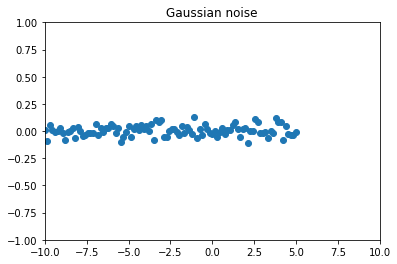

In [170]:
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

In [171]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[ 9.7498e-03],
        [-9.1108e-02],
        [ 5.6309e-02],
        [ 8.3776e-03],
        [-1.1921e-02],
        [-4.1179e-04],
        [ 2.6528e-02],
        [-1.6527e-02],
        [-7.6975e-02],
        [-5.3928e-03],
        [ 1.1365e-03],
        [ 2.7356e-02],
        [-6.0680e-02],
        [ 3.7806e-02],
        [-5.6875e-04],
        [-4.5551e-02],
        [-2.7893e-02],
        [-9.0823e-03],
        [-2.2969e-02],
        [-1.3905e-02],
        [ 6.4162e-02],
        [-4.2495e-02],
        [ 3.6240e-02],
        [-1.5579e-02],
        [ 4.0135e-02],
        [ 1.7381e-02],
        [ 5.3984e-02],
        [ 4.0415e-02],
        [-3.0112e-02],
        [ 4.9034e-03],
        [-1.0027e-01],
        [-2.6240e-02],
        [-2.8627e-02],
        [ 6.8044e-02],
        [-7.6135e-02],
        [ 4.9727e-02],
        [ 9.4328e-03],
        [ 4.6600e-02],
        [ 5.7108e-02],
        [-3.4403e-02],
        [ 7.3028e-02],
        [ 6.6773e-02],
        [ 5.0809e-02],
        [-1

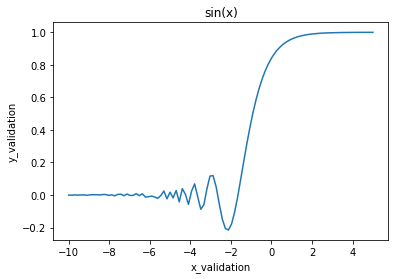

In [172]:
x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
plt.plot(x_validation.numpy(), y_validation.numpy())
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [173]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[-1.5482e-04],
        [-1.0732e-03],
        [ 7.0097e-04],
        [-5.7608e-04],
        [ 6.5311e-04],
        [ 9.8906e-04],
        [-1.7836e-03],
        [ 1.5283e-03],
        [ 1.8686e-03],
        [ 2.1850e-03],
        [ 3.1936e-04],
        [ 2.6806e-03],
        [ 3.3656e-03],
        [-2.4106e-03],
        [ 1.0479e-03],
        [-4.6642e-03],
        [ 3.9665e-03],
        [ 4.9870e-03],
        [-4.1531e-03],
        [ 6.0007e-03],
        [-2.5418e-03],
        [-2.2237e-03],
        [ 8.5996e-03],
        [-3.8417e-03],
        [ 7.4946e-03],
        [-1.2848e-02],
        [-1.0455e-02],
        [-6.5007e-03],
        [-1.1817e-02],
        [-2.0529e-02],
        [-2.9803e-03],
        [ 2.4776e-02],
        [-2.3459e-02],
        [ 1.7232e-02],
        [-1.7709e-02],
        [ 2.7786e-02],
        [-4.1880e-02],
        [ 3.9170e-02],
        [ 4.1222e-03],
        [-5.7028e-02],
        [ 2.3338e-02],
        [ 6.8612e-02],
        [-1.0514e-02],
        [-8

In [174]:
def metric(pred, target):
    return (pred - target).abs().mean()

In [179]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.4)

In [180]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()


In [181]:
for epoch_index in range(1000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()
    
print(metric(net.forward(x_validation), y_validation).item())

0.021262185648083687


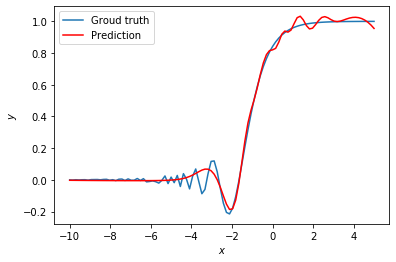

In [182]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), c='r', label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')


predict(net, x_validation, y_validation)